<h1><center>Strategic grouping</center></h1>
<center><img src='https://bernardmarr.com/wp-content/uploads/2021/07/the-10-biggest-strategy-mistakes-companies-make.png' width='520' height="520" ></center>


This notebook will go through the strategic grouping phase of competitive analysis to define the strategic groups within the automotive industry in india using a mathematical methodology.


#### But firstly, What is a strategic group?
**[A strategic group](https://en.wikipedia.org/wiki/Strategic_group)** is a concept used in strategic management that groups companies within an industry that have similar business models or similar combinations of strategies. For example, the restaurant industry can be divided into several strategic groups including fast-food and fine-dining based on variables such as preparation time, pricing, and presentation. The number of groups within an industry and their composition depends on the dimensions used to define the groups. Strategic management professors and consultants often make use of a two dimensional grid to position firms along an industry's two most important dimensions in order to distinguish direct rivals (those with similar strategies or business models) from indirect rivals. 

# Objective 
The main objective of this report is to be able to identify the strategic group of a car given a set of features to that car.

The Car we want to identify the strategic group for is Toyota Corolla which is known as Corolla Altis in india

<center><img src='https://imgd.aeplcdn.com/1056x594/cw/ec/26588/Toyota-Corolla-Altis-Exterior-114986.jpg?wm=1&q=85' width='500' height='%00'></center>

The Corolla is a world wide best seller and it has been sold for many years, but as the automotive market became full of comptitiors an extensive analysis is needed to identifiy the strategic group competing with the company in the market

### Approach 
This report will follow a mathematical approach using a method called clustring to achive the objective of identifying strategic group.

## Challenge


The automotive industry is one of the largest industries out there it's a [2.6 trillion dollar industry](https://www.ibisworld.com/global/market-size/global-car-automobile-manufacturing/)! 


But inside the industry there are too many categories and subcategories constructed by too many variables that it almost safe to say that every category is an industry of itself.
for instance the car body variable is a vital one, as diffrernt body types are being used for very different reason here is a list of some car body type:
- SEDAN
- COUPE
- STATION WAGON
- HATCHBACK
- CONVERTIBLE
- SPORT-UTILITY VEHICLE (SUV)
- MINIVAN



#### And this just to name a few!, here is a [photo](http://carsonelove.com/car-body-types#prettyPhoto) show some of car types in more details

<center><img src='http://carsonelove.com/wp-content/uploads/2014/01/Type-of-Cars.jpg' width='620' height='620'></center>


And all of the variety above is only regarding the car body type which is only one variable!, not to mention that there are grey areas where some car body types can be irrelevant to customer decision.
#### So for a car company it's really a challenge to identify its strategic group as it really takes a lot of effort to put all variable in consideration.

# Data

The [dataset](https://www.kaggle.com/medhekarabhinav5/indian-cars-dataset) used in this report is having the latest information about cars in the Indian market. The dataset contains cars with their variants, In dataset there are 1200+ model/variants to study. There is a variety of Makes/Models which can be studied, All prices has been converted from indian rupee to USD, The dataset has updated information till 4th June 2020.

<font color='red'>P.S the prices provided here is neither collected nor checked by the author of this notebook, also this report it for educational purposes only.</font>

### This report will have to main part
- [Exploratory Data analysis](#EDA)
- [Clustering of car data.](#clus)

In [5]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

# Loading data and cleaning data

In [97]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\cars_engage_2022.csv',index_col=0)

### here is a sample of the data

In [7]:
df.sample(8)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1020,Hyundai,Tucson,2Wd At Gl(O) Diesel,"Rs. 24,23,720",1995 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,62 litres,Diesel,1660 mm,4475 mm,1850 mm,SUV,5.0,16.38 km/litre,...,Cup Holders,Yes,NaN,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
63,Maruti Suzuki,Celerio X,Vxi,"Rs. 4,75,198",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,35 litres,Petrol,1560 mm,3600 mm,1600 mm,Hatchback,5.0,23 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,Hyundai,Verna,1.6 Vtvt Sx (O),"Rs. 11,72,999",1591 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,45 litres,Petrol,1445 mm,4440 mm,1729 mm,Sedan,4.0,NaN,...,Cup Holders,Yes,NaN,Yes,NaN,Yes,NaN,NaN,Yes,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
937,Maruti Suzuki,Ertiga,1.5L Zdi Plus,"Rs. 11,20,689",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,45 litres,Diesel,1690 mm,4395 mm,1735 mm,MPV,5.0,NaN,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,Nissan,Micra,Xv Cvt,"Rs. 7,81,686",1198 cc,3.0,12.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,41 litres,Petrol,1530 mm,3825 mm,1665 mm,Hatchback,5.0,NaN,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,NaN,Mercedes-Benz C-Class,C 43 Amg,"Rs. 75,00,000",3982 cc,8.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,66 litres,Petrol,1426 mm,4756 mm,1839 mm,Coupe,4.0,NaN,...,Cup Holders,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1164,Jaguar,F-Type,Svr Coupe,"Rs. 2,65,01,830",5000 cc,8.0,4.0,AWD (All Wheel Drive),V,BS IV,"Front, Longitudinal",Injection,70 litres,Petrol,1311 mm,4475 mm,2042 mm,Coupe,2.0,NaN,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1257,Mahindra,Verito,1.5 D6 Bs-Iv,"Rs. 8,45,154",1461 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,50 litres,Diesel,1540 mm,4277 mm,1740 mm,Sedan,4.0,18 km/litre,...,Cup Holders,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### showning important features regarding the dataset

In [65]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

#### Since the dataset is full of features, we will choose only a subset of  useful features to work with, also we will clean the data to extract useful information

In [98]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(float)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(float) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(float)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(float)
df.Seating_Capacity = df.Seating_Capacity.astype(float)
df.Number_of_Airbags = df.Number_of_Airbags.astype(float)
df.Displacement = df.Displacement.astype(float)
df.Cylinders = df.Cylinders.astype(float)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

<a id='EDA'></a>
# Exploratory Data analysis


### Now We check a sample of dataset after cleaning it

In [67]:
df.head(6)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
0,Tata,Nano Genx,Tata Nano Genx,Xt,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624.0,2.0,23.60,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,4097
1,Tata,Nano Genx,Tata Nano Genx,Xe,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624.0,2.0,23.60,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,3310
3,Tata,Nano Genx,Tata Nano Genx,Xta,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),624.0,2.0,21.90,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,4686
4,Tata,Nano Genx,Tata Nano Genx,Xm,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624.0,2.0,23.60,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,3811
5,Tata,Nano Genx,Tata Nano Genx,Xma,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),624.0,2.0,21.90,37.48,51.0,24.0,1652.0,3164.0,1750.0,5.0,4.0,2230.0,0.0,4407
6,Datsun,Redi-Go,Datsun Redi-Go,D,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799.0,3.0,25.17,53.26,72.0,28.0,1541.0,3429.0,1560.0,5.0,5.0,2348.0,0.0,3915


#### Now we find what is the main features regarding the car 

In [99]:
data = df.copy()
data = data.select_dtypes(exclude=['object'])
features = list(data.columns)
print(features)

['displacement', 'cylinders', 'mileage', 'power', 'torque', 'fuel_tank', 'height', 'length', 'width', 'doors', 'seats', 'wheelbase', 'airbags', 'price']


In [89]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  987 non-null    float64
 1   cylinders     987 non-null    float64
 2   mileage       987 non-null    float64
 3   power         987 non-null    float64
 4   torque        987 non-null    float64
 5   fuel_tank     987 non-null    float64
 6   height        987 non-null    float64
 7   length        987 non-null    float64
 8   width         987 non-null    float64
 9   doors         987 non-null    float64
 10  seats         987 non-null    float64
 11  wheelbase     987 non-null    float64
 12  airbags       987 non-null    float64
 13  price         987 non-null    float64
 14  labels        987 non-null    object 
dtypes: float64(14), object(1)
memory usage: 111.9+ KB


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 1275
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  987 non-null    float64
 1   cylinders     987 non-null    float64
 2   mileage       987 non-null    float64
 3   power         987 non-null    float64
 4   torque        987 non-null    float64
 5   fuel_tank     987 non-null    float64
 6   height        987 non-null    float64
 7   length        987 non-null    float64
 8   width         987 non-null    float64
 9   doors         987 non-null    float64
 10  seats         987 non-null    float64
 11  wheelbase     987 non-null    float64
 12  airbags       987 non-null    float64
 13  price         987 non-null    float64
dtypes: float64(14)
memory usage: 115.7 KB


In [70]:
data.describe()

,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,1759.184397,4.220871,18.515380,141.617224,244.030395,50.920871,1583.807340,4252.248875,1775.582416,4.570415,5.266464,2606.583587,3.175279,48009.175279
std,924.993708,1.380041,4.588321,116.238232,162.614837,15.318039,152.821356,447.163835,144.234947,0.714850,1.085082,180.699575,2.500847,105460.579796
min,624.000000,2.000000,3.400000,33.530000,10.000000,24.000000,1.845000,4.640000,1.845000,2.000000,2.000000,1840.000000,0.000000,3310.000000
25%,1198.000000,4.000000,16.000000,81.860000,120.000000,40.000000,1495.000000,3985.000000,1695.000000,4.000000,5.000000,2470.000000,2.000000,10104.500000
50%,1496.000000,4.000000,18.490000,102.580000,200.000000,45.000000,1549.000000,4315.000000,1745.000000,5.000000,5.000000,2590.000000,2.000000,13994.000000
75%,1988.000000,4.000000,21.700000,152.880000,320.000000,60.000000,1655.000000,4568.000000,1832.000000,5.000000,5.000000,2700.000000,6.000000,27626.500000
max,6752.000000,12.000000,28.400000,778.210000,1712.000000,105.000000,2055.000000,5575.000000,2226.000000,5.000000,9.000000,3266.000000,14.000000,744944.000000


In [71]:
data.corr()

,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
displacement,1.000000,0.867143,-0.667444,0.914424,0.828819,0.823269,-0.045095,0.627590,0.635063,-0.466925,-0.161533,0.629630,0.524808,0.869878
cylinders,0.867143,1.000000,-0.552145,0.882458,0.737185,0.694284,-0.227091,0.500427,0.523168,-0.501023,-0.348182,0.490869,0.432210,0.868627
mileage,-0.667444,-0.552145,1.000000,-0.668982,-0.578886,-0.726681,-0.102602,-0.584995,-0.529757,0.297087,0.006110,-0.561008,-0.433588,-0.553728
power,0.914424,0.882458,-0.668982,1.000000,0.833273,0.763310,-0.229689,0.573103,0.626671,-0.550160,-0.352487,0.566059,0.541501,0.931561
torque,0.828819,0.737185,-0.578886,0.833273,1.000000,0.812457,-0.010492,0.683731,0.712913,-0.346248,-0.123870,0.701764,0.580415,0.737356
fuel_tank,0.823269,0.694284,-0.726681,0.763310,0.812457,1.000000,0.151903,0.764325,0.729014,-0.274003,0.034317,0.791640,0.595092,0.658390
height,-0.045095,-0.227091,-0.102602,-0.229689,-0.010492,0.151903,1.000000,0.078707,0.129398,0.559601,0.744145,0.182036,-0.104321,-0.276826
length,0.627590,0.500427,-0.584995,0.573103,0.683731,0.764325,0.078707,1.000000,0.799120,-0.273403,0.121575,0.869473,0.617907,0.438164
width,0.635063,0.523168,-0.529757,0.626671,0.712913,0.729014,0.129398,0.799120,1.000000,-0.165546,0.019329,0.727521,0.537462,0.520027
doors,-0.466925,-0.501023,0.297087,-0.550160,-0.346248,-0.274003,0.559601,-0.273403,-0.165546,1.000000,0.538670,-0.127591,-0.190436,-0.548573


The of the car is 

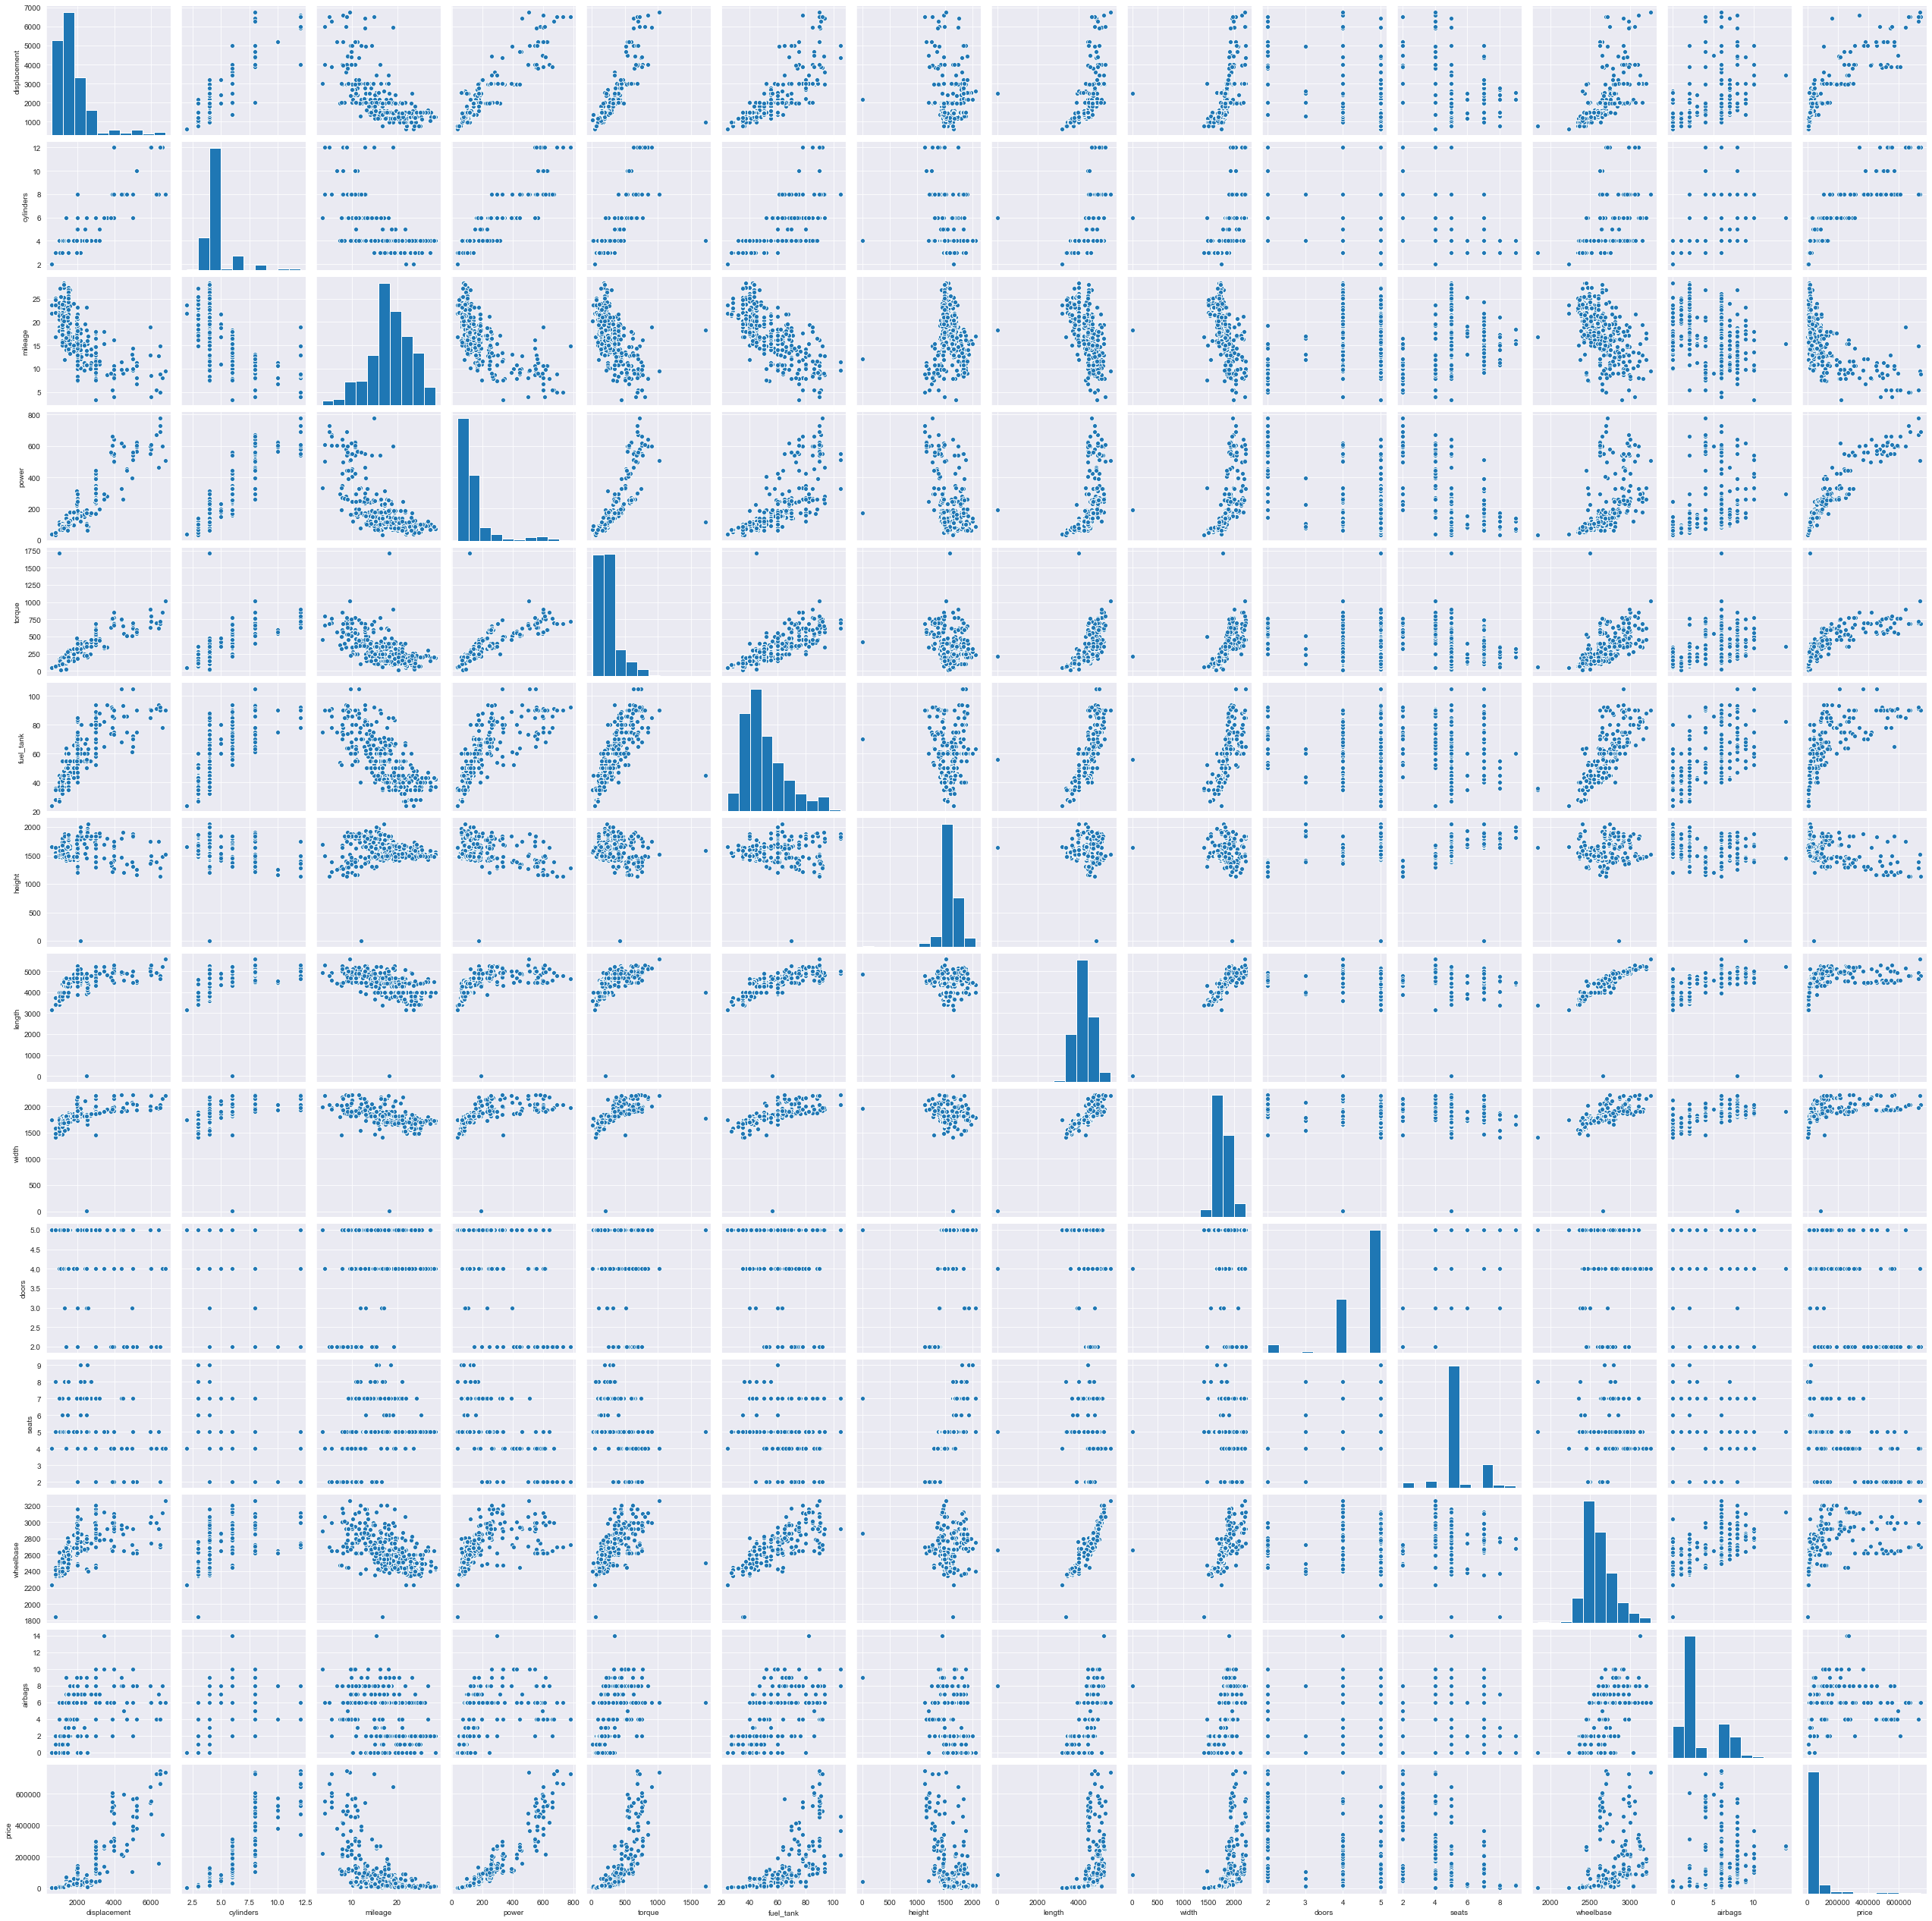

In [72]:
sns.pairplot(data)

In [39]:
from sklearn.preprocessing import StandardScaler

In [101]:
data2 = StandardScaler().fit_transform(data.values)
data2 = pd.DataFrame(data2,columns=features)
data2

,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
0,-1.227857,-1.610095,1.108727,-0.896349,-1.187642,-1.758353,0.446451,-2.434903,-0.177456,0.601249,-1.167751,-2.085088,-1.270325,-0.416596
1,-1.227857,-1.610095,1.108727,-0.896349,-1.187642,-1.758353,0.446451,-2.434903,-0.177456,0.601249,-1.167751,-2.085088,-1.270325,-0.424063
2,-1.227857,-1.610095,0.738034,-0.896349,-1.187642,-1.758353,0.446451,-2.434903,-0.177456,0.601249,-1.167751,-2.085088,-1.270325,-0.411004
3,-1.227857,-1.610095,1.108727,-0.896349,-1.187642,-1.758353,0.446451,-2.434903,-0.177456,0.601249,-1.167751,-2.085088,-1.270325,-0.419311
4,-1.227857,-1.610095,0.738034,-0.896349,-1.187642,-1.758353,0.446451,-2.434903,-0.177456,0.601249,-1.167751,-2.085088,-1.270325,-0.413654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,-0.282507,-0.160128,1.435810,-0.370007,-0.270902,-0.713303,-0.581413,0.420084,-0.558972,-0.798356,-0.245695,-0.036452,-0.470190,-0.282538
983,-0.282507,-0.160128,1.435810,-0.370007,-0.270902,-0.713303,-0.581413,0.420084,-0.558972,-0.798356,-0.245695,-0.036452,1.130078,-0.266733
984,-0.283588,-0.160128,0.890672,-0.208705,-0.609296,-0.713303,-0.581413,0.420084,-0.558972,-0.798356,-0.245695,-0.036452,1.130078,-0.265404
985,-0.283588,-0.160128,-0.155992,-0.208705,-0.609296,-0.713303,-0.581413,0.420084,-0.558972,-0.798356,-0.245695,-0.036452,-0.470190,-0.295953


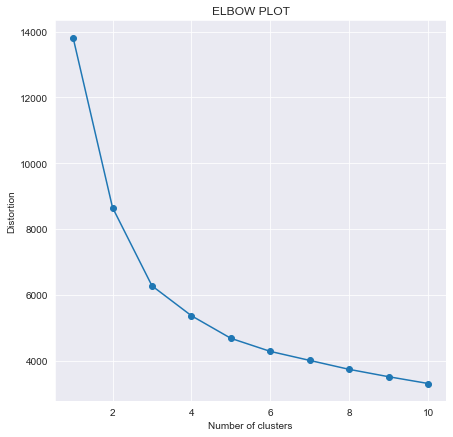

In [102]:
from sklearn import cluster
distortions = [] # Empty list to store wss
for i in range(1, 11):
    km = cluster.KMeans(n_clusters=i,
    init='k-means++',
    n_init = 10,
    max_iter = 300,
    random_state = 100)
    km.fit(data2.values)
    distortions.append(km.inertia_)
#Plotting the K-means Elbow plot
plt.figure(figsize = (7,7))
plt.plot(range(1,11), distortions, marker='o')
plt.title('ELBOW PLOT')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

By Elbow method it is obvious to choose 3 clusters

In [103]:
k = 3
km3 = cluster.KMeans(n_clusters=k,
    init='k-means++',
    n_init = 10,
    max_iter = 300,
    random_state = 100)
km3.fit(data2.values)

KMeans(n_clusters=3, random_state=100)

In [54]:
pd.set_option('display.max_row',300)
pd.set_option('display.max_column',333)

In [104]:
labels = km3.labels_
Ccenters = km3.cluster_centers_
data2['labels'] = labels
data2['labels'] = data2['labels'].astype('str')
print(data2['labels'])
labels

0      0
1      0
2      0
3      0
4      0
      ..
982    0
983    0
984    0
985    0
986    1
Name: labels, Length: 987, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

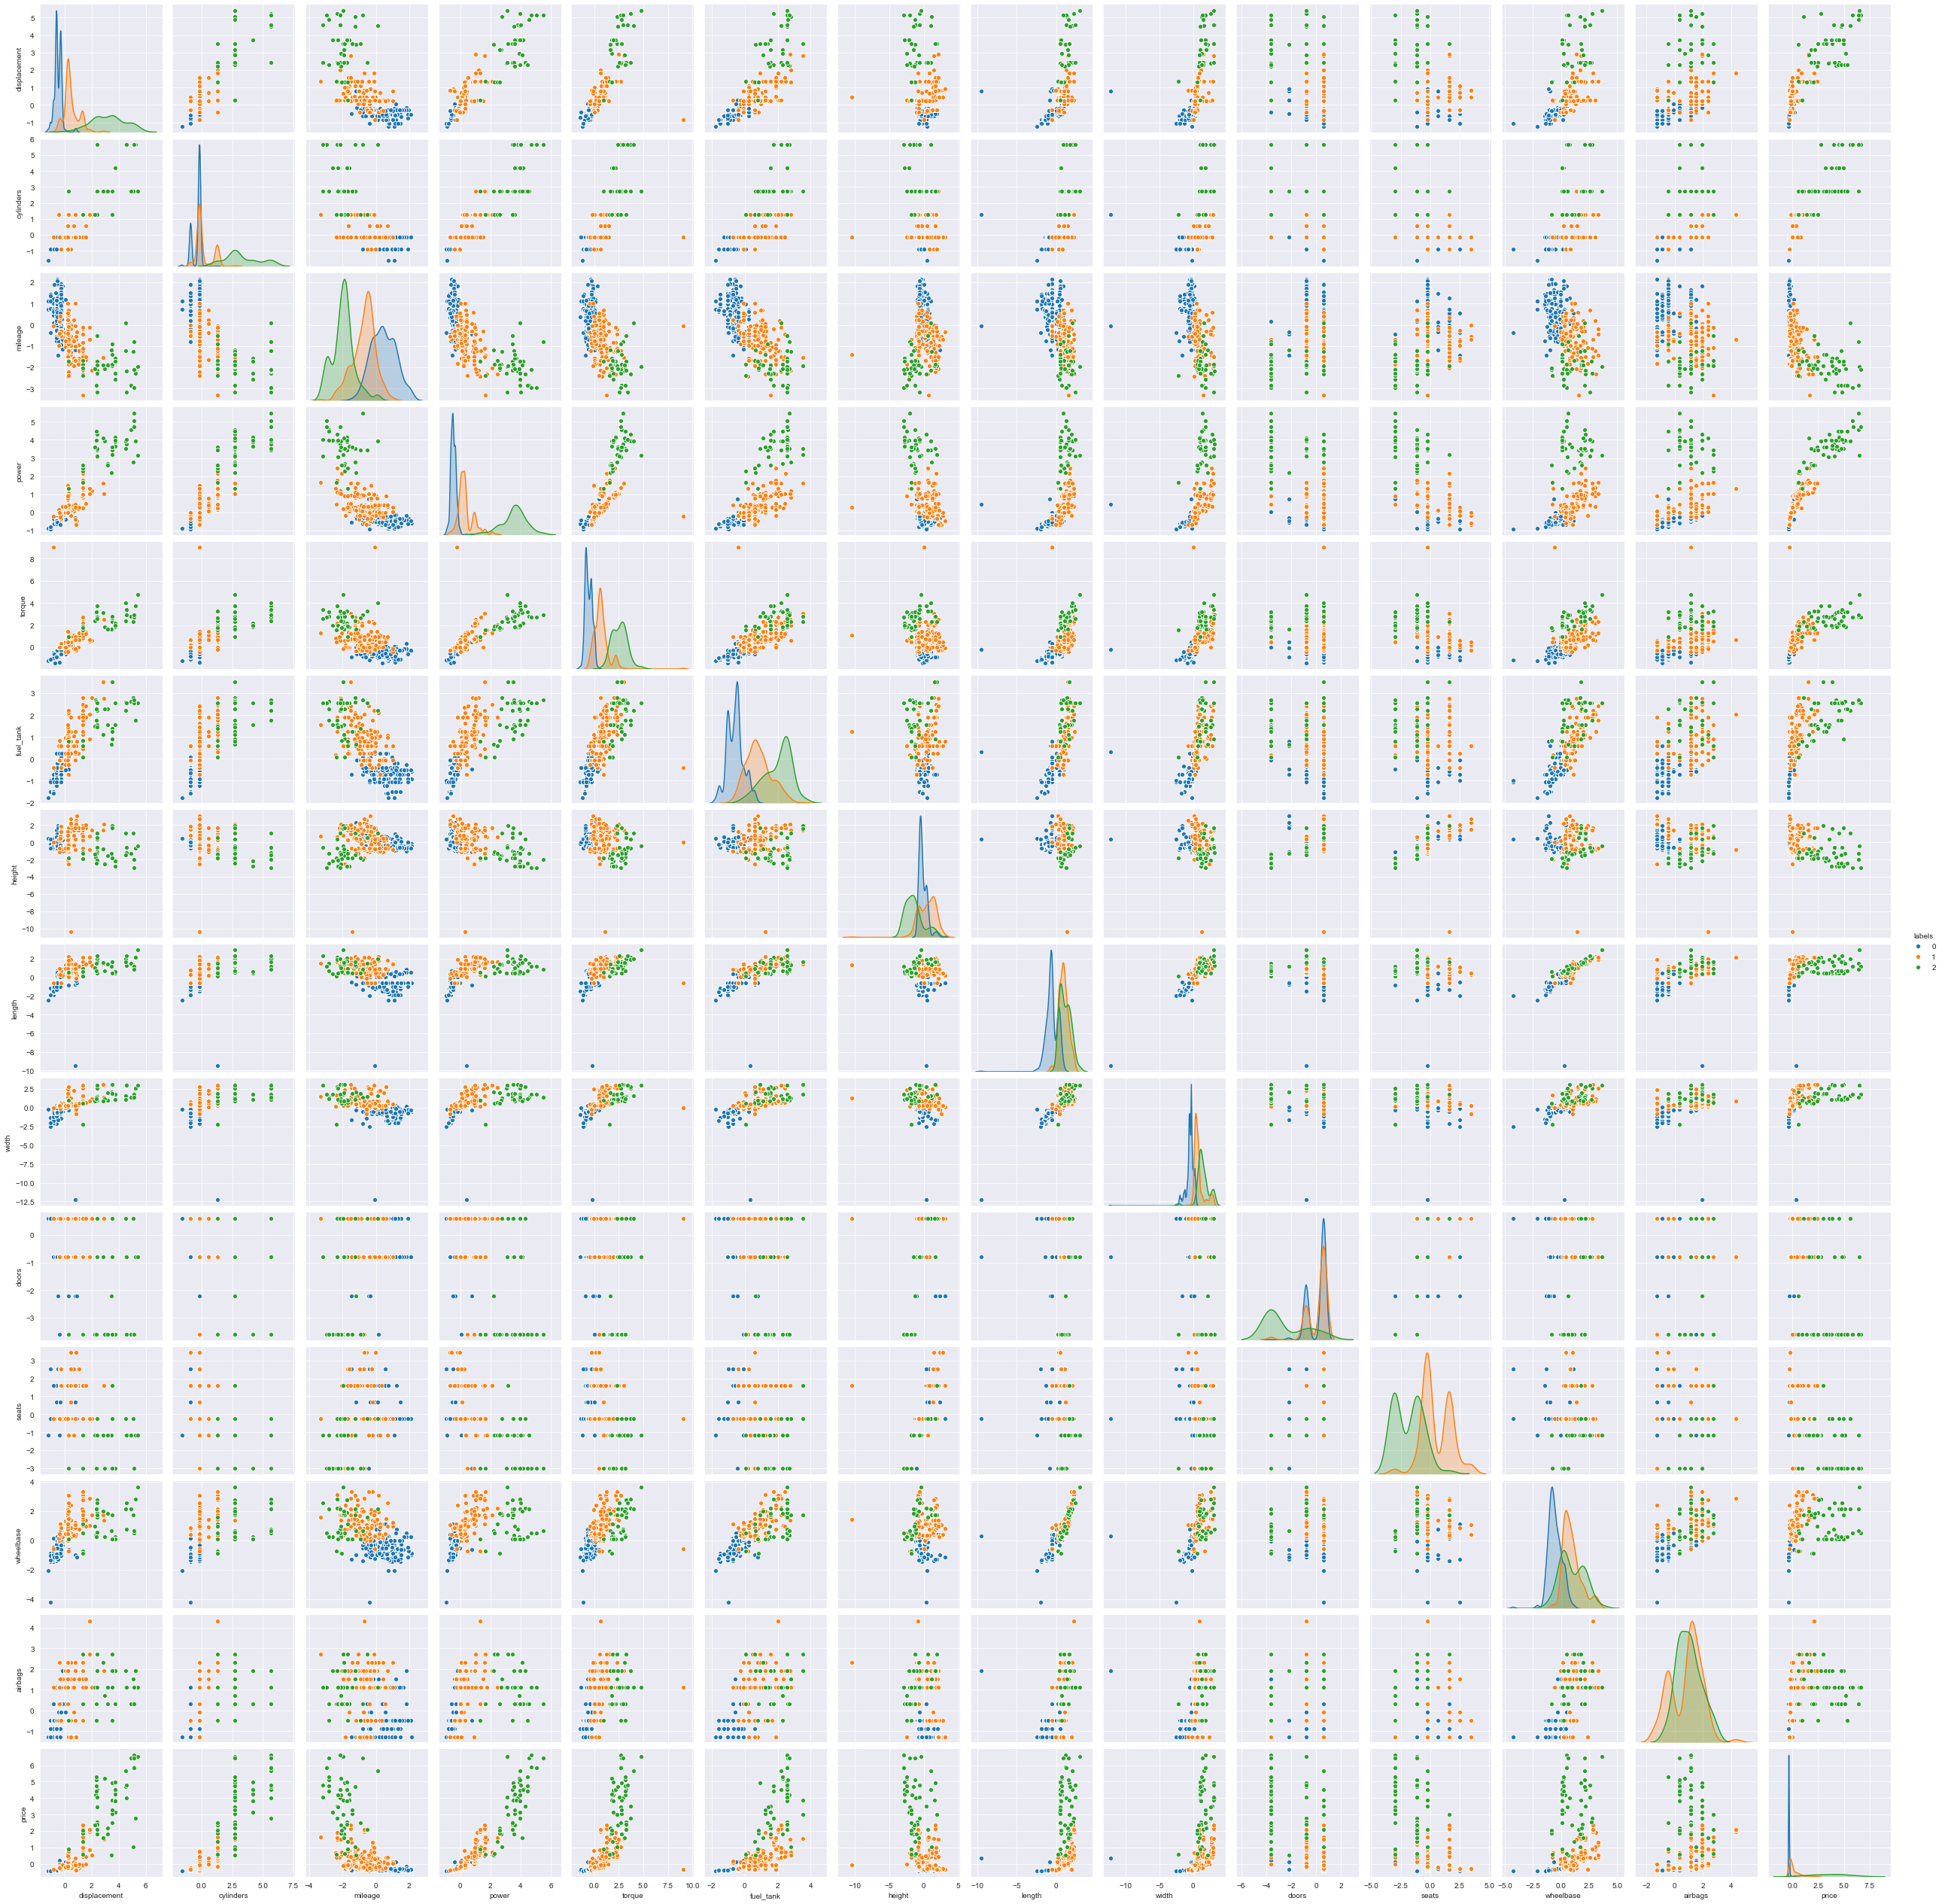

In [77]:
sns.pairplot(data2, x_vars = features, y_vars = features, hue='labels', diag_kind='kde')
plt.show()

This indicates separation of features amoung clusters.

In [127]:
km = KMeans(n_clusters=3, n_init=10, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(15)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
413,Mahindra,Kuv100 Nxt,Mahindra Kuv100 Nxt,K2 D 6Str Taxi,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1198.0,3.0,25.32,75.95,190.0,35.0,1655.0,3700.0,1735.0,5.0,6.0,2385.0,0.0,7836.374,2
400,Mahindra,Kuv100 Nxt,Mahindra Kuv100 Nxt,K6+ 6Str,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1198.0,3.0,18.15,80.88,115.0,35.0,1655.0,3700.0,1735.0,5.0,6.0,2385.0,2.0,8836.016,2
729,Jeep,Compass,Jeep Compass,1.4 Limited (O) At Petrol Black Pack,SUV,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1368.0,6.0,16.30,159.78,250.0,60.0,1640.0,4395.0,1818.0,5.0,5.0,2636.0,6.0,28980.000,1
538,Maruti Suzuki,Vitara Brezza,Maruti Suzuki Vitara Brezza,Ldi,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248.0,4.0,24.30,88.77,200.0,48.0,1640.0,3995.0,1790.0,5.0,5.0,2500.0,2.0,10678.388,2
916,Hyundai,Grand I10,Hyundai Grand I10,1.2 Kappa Vtvt Sportz At,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1197.0,4.0,17.49,81.86,114.0,43.0,1520.0,3765.0,1660.0,5.0,5.0,2425.0,2.0,9877.532,2
204,Toyota,Platinum Etios,Toyota Platinum Etios,Vxd Limited Edition,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364.0,4.0,23.59,67.07,170.0,45.0,1510.0,4369.0,1695.0,4.0,5.0,2550.0,2.0,12787.600,2
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364.0,4.0,21.00,86.80,205.0,43.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,3.0,24794.000,1
1127,Hyundai,Creta,Hyundai Creta,1.6 Crdi Sx At,SUV,Diesel,Injection,Automatic,FWD (Front Wheel Drive),1582.0,4.0,17.01,126.25,260.0,55.0,1630.0,4270.0,1780.0,5.0,5.0,2590.0,2.0,21383.530,1
127,Hyundai,Elite I20,Hyundai Elite I20,Asta (O) 1.2,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197.0,4.0,18.15,82.85,114.0,45.0,1505.0,3995.0,1734.0,5.0,5.0,2570.0,6.0,11325.902,2
66,Maruti Suzuki,Celerio X,Maruti Suzuki Celerio X,Zxi,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),998.0,3.0,23.10,67.07,90.0,35.0,1560.0,3600.0,1600.0,5.0,5.0,2425.0,1.0,6996.276,2


In [128]:
df.cluster.value_counts()

2    595
1    179
3     66
Name: cluster, dtype: int64

In [129]:
c_df = pd.concat.loc(:,[data[data2['labels']=='0'].mean(),
                data[data2['labels']=='1'].mean(),
                data[data2['labels']=='2'].mean()],
                axis=1)
c_df.columns = ['cluster1','cluster2','cluster3']
c_df

SyntaxError: invalid syntax (<ipython-input-129-d9d164abc21d>, line 1)

In [11]:
df[df.model =='Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266


> #### We can see that there are 6 variants of the car in the market

### Now we check the distribution of some features in the dataset
### First we Check the price distribution, we will use both normal and log scales due to the huge difference in prices.

In [23]:
# fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
# sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
# ax12 = ax1.twinx()
# sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
# ax12.grid()
# ax1.set_title('Histogram of cars price data',fontsize=16)
# ax1.set_xlabel('')
# logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
# sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
# ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
# ax2.set_xscale('log')
# ax22 = ax2.twinx()
# ax22.grid()
# sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
# ax2.set_xlabel('Price (log)', fontsize=14)
# ax22.set_xticks((800,1000,10000,100000,1000000))
# ax2.xaxis.set_tick_params(labelsize=14);
# ax1.xaxis.set_tick_params(labelsize=14);

### Seems like there is a lot of varaince in price we can check that by plotting a box plot 

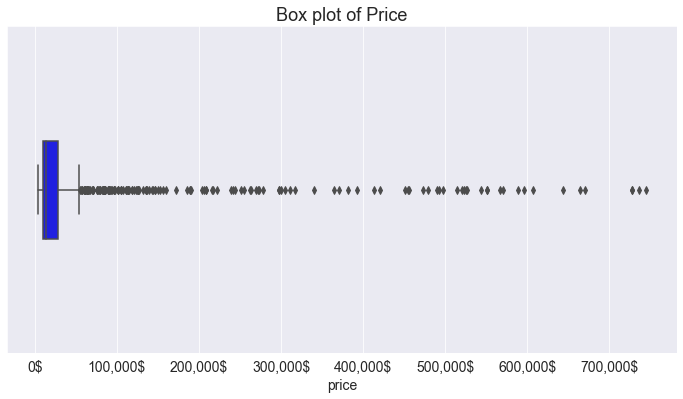

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

> #### Seems that there is a lot of outliers that form a very different type(s) of cars or to be mor exact there are very different categories in the automotive market

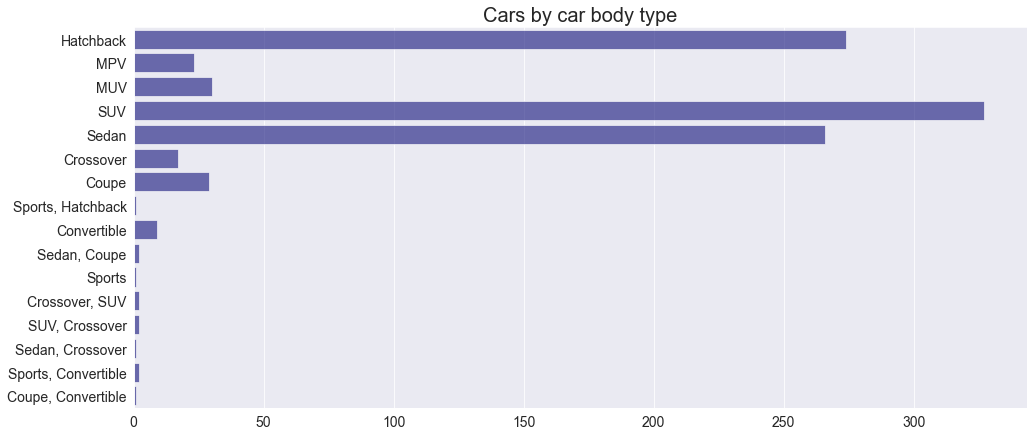

In [25]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

> #### SUV's Sedans and hatchbacks seems to be the dominating car types

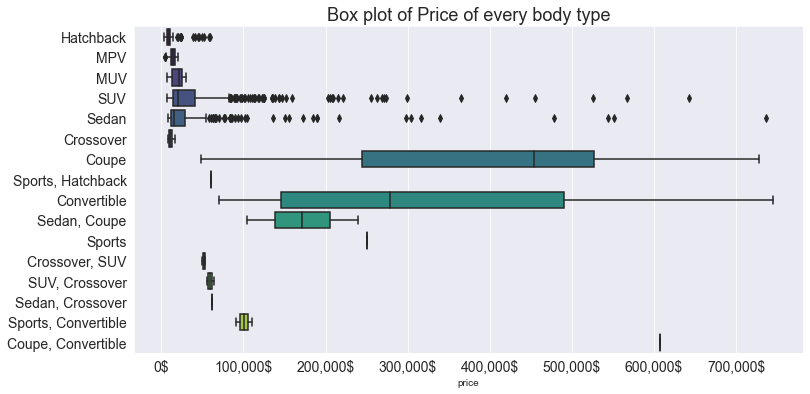

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

> #### It's Clear that Car body type strongly affect the price 

### Now we check cars by Fuel type

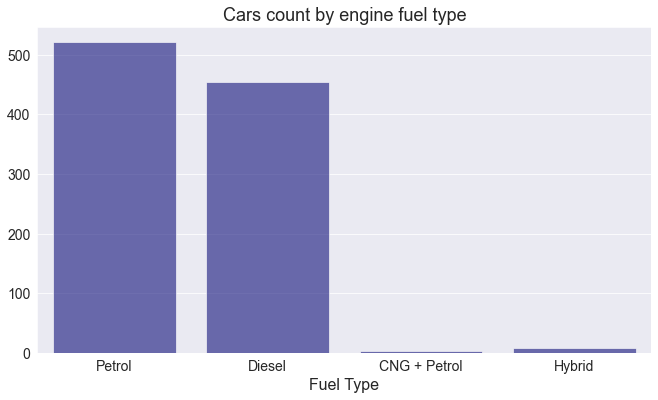

In [27]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

> #### Most cars seems to be run on gas or Diesel

### Now we check car by engine size

In [30]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 1008x432 with 0 Axes>

> #### Seems like most of cars have engine size in the 1000:2000cc range

### Now We check the Horsepower of cars

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### Now we check the relation horsepower and price considering diffreent body type

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

> #### Horsepower of car seems to be highly related to car price but car body type seems a little bit blurry but hatchbacls seems to be the body type with the least horsepower and price

### We can also look into the relation between Mileage and price

In [ ]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

> #### It's looks like expensive cars tend to have worse mileage

### We can also check the overall correlation of between variables and each other

### First we make a pearson correlation grid

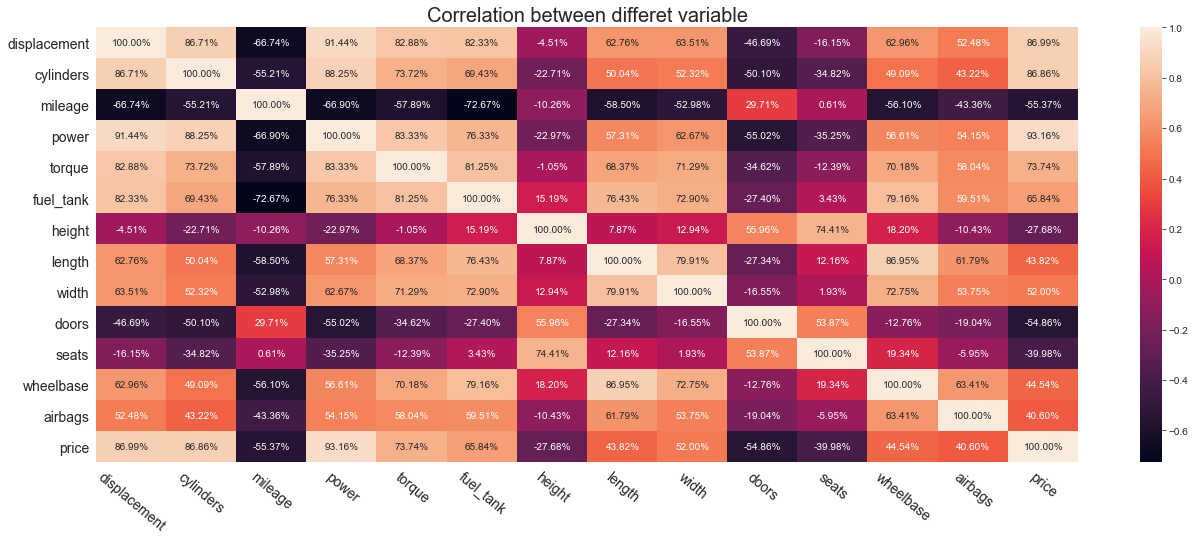

In [36]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

### Now we check an extensive scatter plot grid of more numerical variable to investigate the realtion in more detail

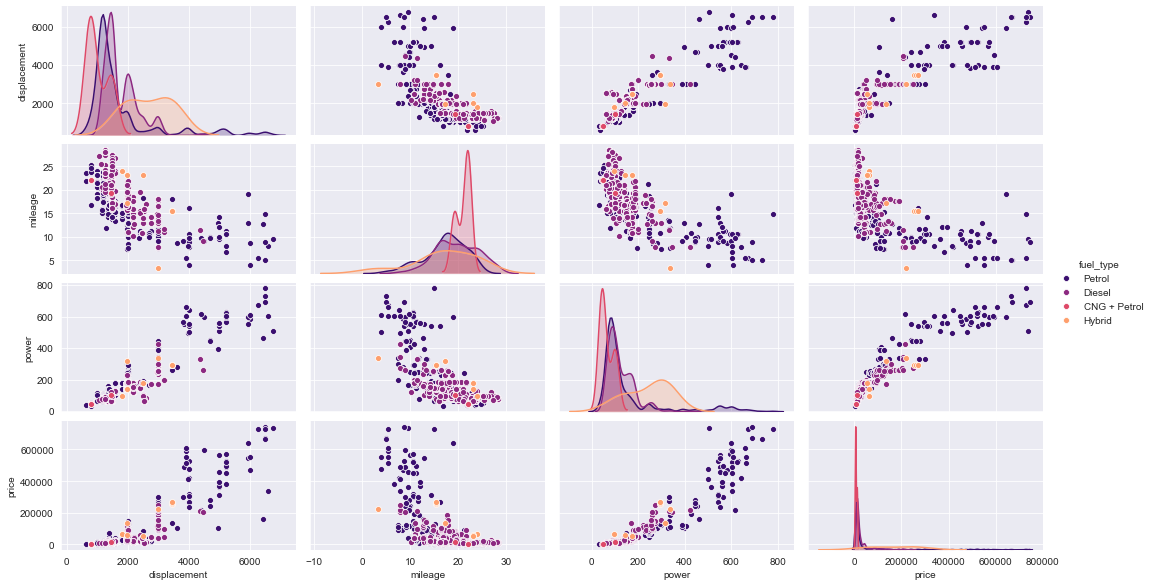

In [37]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

> #### Seems there are a lot of multicollinearity between variables.

### Now lets make a 3D scatter plot to check for obvious clusters with main features as price horsepower and mileage

### Using more interactive plot to show the previous plot and also adding the car manufacturer

In [109]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

> #### As shown in previous figures clustring the market needs a lot f effort as the separation of clusters is not that obvious

# IS that All?


It's now clear that we have to look to many dimensions in order to cluster the market, as the more features we explore the harder it's to cluster the market.
These dimensions affect the decision of the buyers not to mention it also precvied totally different due to the very different mental models of buyers, in other words, price horsepower and mileage are not everything, some buyers would like to have a long wheel base car, some would like to have wider car all of the previous features, and more, strongly affect the buyer' decisions.

This means that two car can have very similar price and milage but one is a van with lots of space and the other is just a four doors sedan, these two cars are precieved as two different categories in the automotive industry so space "length width and height of the car" can also be a vital factor.


<center><img src='https://www.cnet.com/a/img/qtmmL-iMd08jk2MYEVNPkfs7M8U=/2019/02/03/9cd75864-225d-406e-baa0-4852091faf61/2019-dodge-grand-caravan-35th-anniversary-1.jpg' width='480' height="480" ></center>
dodge-grand-caravan which considered to be a soccer mom van


<center><img src='https://upload.wikimedia.org/wikipedia/commons/a/ac/2018_Toyota_Camry_%28ASV70R%29_Ascent_sedan_%282018-08-27%29_01.jpg' width='480' height="480" ></center>
toyota camry which is more of an upper class four door sedan

#### So, a three dimensional representation won't tell everythings, so thats why we will try to consider clustering to use the very different features associated with each car

<a id='clus'></a>
# [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) 
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.



#### The type of clustering used here is [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances)
<center><img src='https://i.giphy.com/DHqth0hVQoIzS.gif' width='480' height="480" ></center>

### We will drop the cars over 60k as they totally not a match for the corolla

In [110]:
df = df[df.price < 60000]

### Now we choose a collection of features to build 8 clusters of cars

In [111]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

### Fitting K-means clustering model with 10 clusters and adding a cluster column to the dataset

In [112]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
1022,Volkswagen,Passat,Volkswagen Passat,2.0 Tdi Highline,Sedan,Diesel,Injection,Automatic,FWD (Front Wheel Drive),1968.0,4.0,17.42,177.54,350.0,66.0,1456.0,4767.0,1832.0,4.0,5.0,2786.0,9.0,46501.000,3
608,Volkswagen,Vento,Volkswagen Vento,Trendline 1.5 (D),Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498.0,4.0,20.64,103.56,250.0,55.0,1467.0,4390.0,1699.0,4.0,5.0,2553.0,2.0,13419.000,4
535,Mahindra,Bolero Power Plus,Mahindra Bolero Power Plus,Lx,SUV,Diesel,Injection,Manual,RWD (Rear Wheel Drive),1493.0,4.0,16.50,69.04,195.0,60.0,1880.0,3995.0,1745.0,5.0,7.0,2680.0,1.0,10488.688,2
157,Maruti Suzuki,Dzire,Maruti Suzuki Dzire,Vdi,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248.0,4.0,28.40,73.97,190.0,37.0,1515.0,3995.0,1735.0,4.0,5.0,2450.0,2.0,10606.708,2
559,Ford,Ecosport,Ford Ecosport,1.5L Ti-Vct Titanium Plus,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1497.0,4.0,23.00,121.32,150.0,52.0,1647.0,3998.0,1765.0,5.0,5.0,2519.0,6.0,13998.600,4


### Now we check some scatter plots but with adding cluster.

### Price vs Power

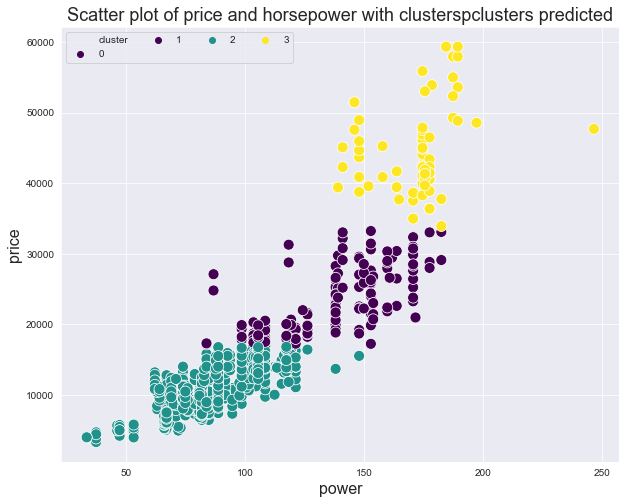

In [130]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='price', x='power',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

> #### We can see the the clusters are strongly affected by the price with clear speration between clusters but it's kind of blurry when it comes to power

### Power vs Mileage

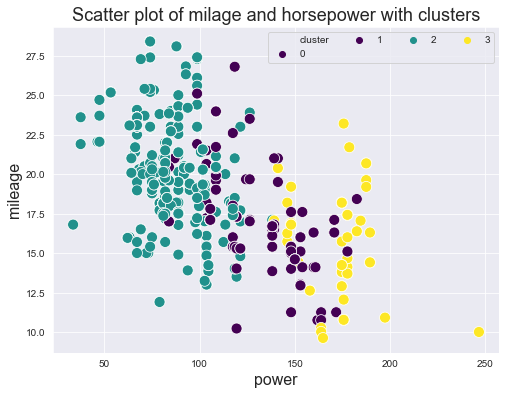

In [131]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='power', y='mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

> #### But yet we can see that clusters speration in power is stronger than mileage which almost have no separation of clusters

### Engine size vs Fuel tank

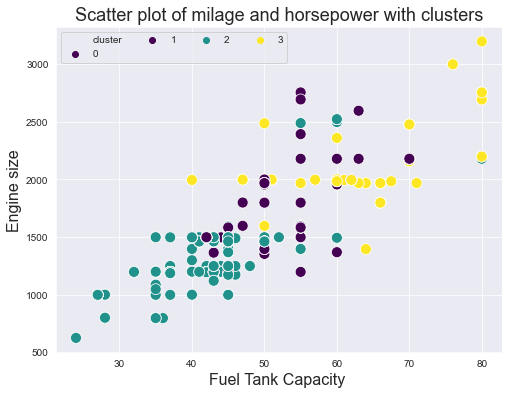

In [132]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='fuel_tank', y='displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

### Now we make an interactive 3D scatter plot of price power, and mileage using also clusters

In [133]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

### Now we check the average prices of each cluster

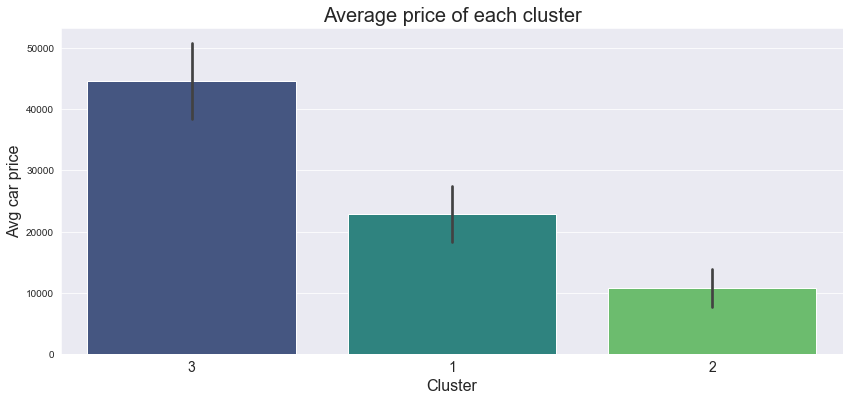

In [136]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
# plt.yticks([i for i in range(0,65000,5000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);

> #### As shown in the scatter plits earlier there is a clear seperation of clusters when it comes to prices

### Now we check how many cars exists in each cluster

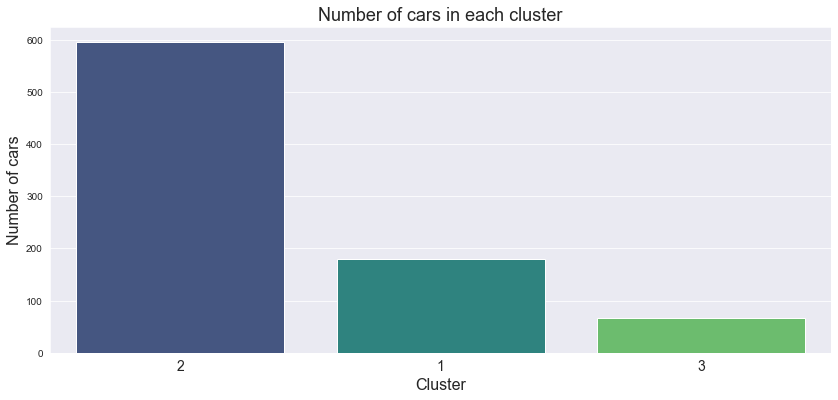

In [135]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x= 'cluster', palette='viridis',order=df.cluster.value_counts().index);
# plt.yticks([i for i in range(0,65000,5000)])
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)
plt.xticks(fontsize=14);

> #### We can generally say that even if clusters generated are not determinant yet we can see that they still can be useful 

# Finding the potential strategic group

### first we find the cluster of the Toyota Corolla (and its variants)

In [137]:
df[df.model == 'Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798.0,4.0,16.7,138.08,173.0,55.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,3.0,23030.0,1
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798.0,4.0,16.7,138.08,173.0,55.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,3.0,25284.0,1
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798.0,4.0,16.7,138.08,173.0,55.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,7.0,26348.0,1
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364.0,4.0,21.0,86.80,205.0,43.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,3.0,27104.0,1
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364.0,4.0,21.0,86.80,205.0,43.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,3.0,24794.0,1
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798.0,4.0,16.7,138.08,173.0,55.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,7.0,28266.0,1


### We found that the cluster of the corolla is cluster 1 and also cluster 5 we can now search these clusters and check what is intersing about it

In [138]:
df_c = df[df.cluster.isin([1,5])]
p_dic = {'Mahindra':'#46327e', 'Tata':'#46327e', 'Toyota':'orange',
         'Jeep':'#46327e', 'Honda':'#46327e', 'Kia':'#46327e',
         'Hyundai':'#46327e','Skoda':'#46327e'}
c_dic = {'Mahindra Scorpio':'#481769', 'Mahindra Xuv500':'#481769', 'Tata Hexa':'#481769',
       'Toyota Innova Crysta':'#481769', 'Jeep Compass':'#481769', 'Toyota Corolla Altis':'orange',
       'Honda Civic':'#481769', 'Kia Seltos':'#481769', 'Tata Safari Storme':'#481769',
       'Hyundai Elantra':'#481769', 'Hyundai Tucson':'#481769', 'Hyundai Creta':'#481769',
       'Tata Harrier':'#481769', 'Skoda Octavia':'#481769'}

### First we check a sample of these clusters

In [139]:
df_c.sample(8)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798.0,4.0,16.70,138.08,173.0,55.0,1475.0,4620.0,1775.0,4.0,5.0,2700.0,7.0,26348.000,1
669,Mahindra,Xuv500,Mahindra Xuv500,W9,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),2179.0,4.0,16.00,152.88,330.0,70.0,1785.0,4585.0,1890.0,5.0,7.0,2700.0,2.0,22245.202,1
731,Jeep,Compass,Jeep Compass,2.0 Limited (O) 4X4 Black Pack,SUV,Diesel,Injection,Manual,AWD (All Wheel Drive),1956.0,6.0,16.30,170.63,350.0,60.0,1640.0,4395.0,1818.0,5.0,5.0,2636.0,6.0,30996.000,1
1015,Hyundai,Tucson,Hyundai Tucson,2Wd At Gl Diesel,SUV,Diesel,Injection,Automatic,FWD (Front Wheel Drive),1995.0,4.0,16.38,182.47,400.0,62.0,1660.0,4475.0,1850.0,5.0,5.0,2670.0,6.0,33100.956,1
599,Renault,Lodgy,Renault Lodgy,Stepway Rxz 110Ps 7-Seater,MUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1461.0,4.0,19.98,108.50,245.0,50.0,1697.0,4498.0,1751.0,4.0,7.0,2810.0,2.0,16962.386,1
652,Mahindra,Marazzo,Mahindra Marazzo,M8 8 Str,MPV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1497.0,4.0,17.30,119.34,300.0,45.0,1774.0,4585.0,1866.0,5.0,8.0,2760.0,2.0,20671.532,1
704,Toyota,Innova Crysta,Toyota Innova Crysta,2.7 Zx At 7 Str,MUV,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),2393.0,4.0,10.75,161.76,245.0,55.0,1795.0,4735.0,1830.0,5.0,7.0,2750.0,7.0,29442.000,1
1138,Tata,Harrier,Tata Harrier,Revotorq Xt,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1956.0,3.0,16.70,138.08,350.0,50.0,1706.0,4598.0,1894.0,5.0,5.0,2741.0,2.0,22279.152,1


### Now we check prices and number of cars in these clusters

KeyError: 'Nissan'

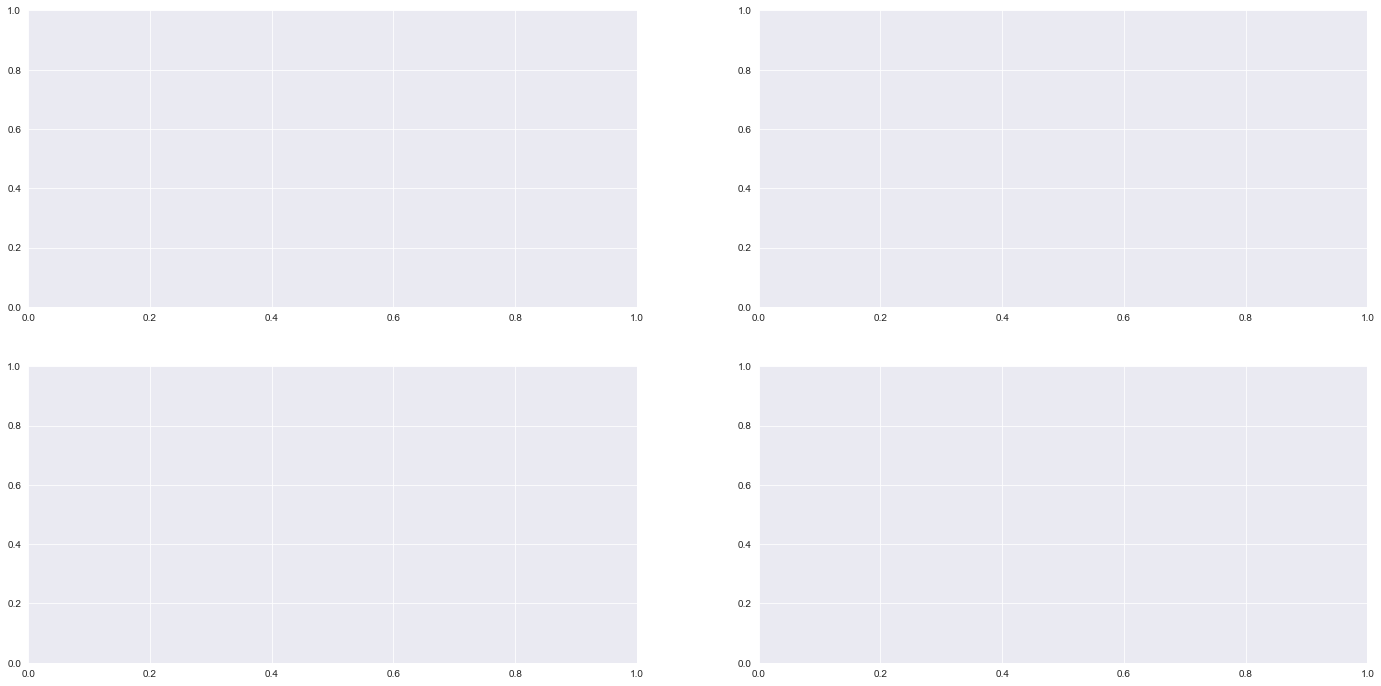

In [140]:
fig = plt.figure(figsize=(24,12))
grid =  gridspec.GridSpec(2, 2, figure= fig, hspace= .2, wspace=.2)
ax11 = fig.add_subplot(grid[0, 0])
ax12 = fig.add_subplot(grid[0, 1])
ax21 = fig.add_subplot(grid[1, 0])
ax22 = fig.add_subplot(grid[1, 1])
order = list(df_c.make.value_counts().index)

sns.countplot(data=df_c, x='make', palette=p_dic, alpha= .9,order=order, ax= ax11)
ax11.set_title('Car makers in the clusters of the Corolla (and each model variant they have)', fontsize=14)
ax11.xaxis.set_tick_params(labelsize=14,rotation=0)

sns.boxplot(data= df_c, x= 'make', y='price', order=order,palette=p_dic, ax=ax12)
ax12.xaxis.set_tick_params(labelsize=14,rotation=0)
ax12.set_title('Prices of Car makers (including each model variant they have)', fontsize=14)
ax12.set_xlabel('')

o2 = list(df_c.car.value_counts(ascending=False).index)
sns.countplot(data=df_c, y='car', palette=c_dic, ax=ax21,order= o2)
ax21.yaxis.set_tick_params(rotation=0, labelsize=13)
ax21.set_title('Number of models\' variants', fontsize=14)

sns.boxplot(data=df_c, y='car', x='price', ax=ax22, order=o2, palette=c_dic )
ax22.set_title('Prices of models\' variants', fontsize=14)
ax22.set_yticklabels([])
ax22.set_ylabel('');

### Here is a more interactive chart that shows cars prices including all variants (with mak and min value of each car)

In [141]:
px.box(data_frame=df_c,x='car',y='price',height=500,  width=800,color='car', color_discrete_sequence=list(c_dic.values()))
# fig.update_layout(show)

### How about car body types in these clusters?

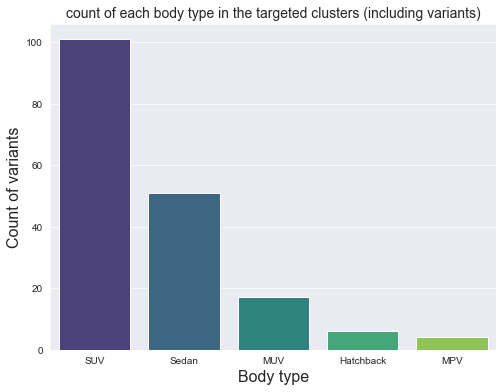

In [142]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_c,x='body_type',palette='viridis')
plt.xlabel('Body type',fontsize=16)
plt.ylabel('Count of variants',fontsize=16)
plt.title('count of each body type in the targeted clusters (including variants)',fontsize=14);

> #### seems like there are too many SUV's in the Toyota Clusters, should that be important?

# How is that any useful?

With clustring there are too many variable taken in considration which are hard to be traced by normal methods.
The clusters generated by the KMeans model can be used to identify what is the strategic group that form a strong competition to the company products in the market it also show the close clusters to this group which also can be put in considration in some cases.

## Problem with clustring

As tempting as it's to use clustring to produce strategic groups it worth mentioning that the clustring process itself is a little bit ambigous and features contribution to the clustering process can't be easily explained so the overall interpretability of the model forms a challenge 

## So is it worthless?!

Absolutely not!, clustring may be not determinant but it can be used to augment the management decision by using it side by side with human intuition to come out with the right strategic group